In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def set_experiment1(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=1000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp1')
    exp_MAB_1.segments_means(param1=3,param2=6)
    df = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df

The true optimal arm is: 5
time: 12.731434106826782


<AxesSubplot:xlabel='arm', ylabel='reward'>

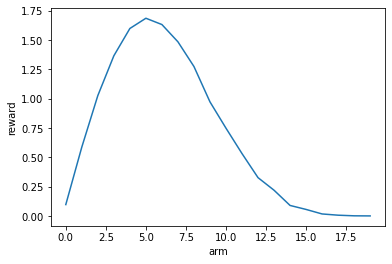

In [3]:
#changeable parameters
np.random.seed(6688)
price_list=np.linspace(0.01,1,20)
T = 2000

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 10
exp_MAB_1, df = set_experiment1(price_list=price_list, segments=segments, update_freq =10)
sns.lineplot(data=df.groupby('arm')['reward'].mean())

In [4]:
#IDS_1
IDS_1_df = pd.DataFrame()
IDS_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_1 time:',end-start)
    IDS_1_df = IDS_1_df.append([np.cumsum(IDS_1_re)])
    IDS_1_df_arm = IDS_1_df_arm.append([IDS_1_arm])

Reward change detected at time: 655
Detected Sign: -1
Detector cooling
Reward change detected at time: 1609
Detected Sign: -1
Reward change detected at time: 1661
Detected Sign: -1
Reward change detected at time: 1851
Detected Sign: -1
Detector cooling
trial 0 IDS_1 time: 58.61807203292847
trial 1 IDS_1 time: 5.787317991256714
Reward change detected at time: 628
Detected Sign: -1
Reward change detected at time: 735
Detected Sign: -1
Detector cooling
Reward change detected at time: 841
Detected Sign: -1
Reward change detected at time: 933
Detected Sign: -1
Reward change detected at time: 1113
Detected Sign: 1
Reward change detected at time: 1268
Detected Sign: -1
Reward change detected at time: 1298
Detected Sign: -1
Reward change detected at time: 1681
Detected Sign: -1
Reward change detected at time: 1981
Detected Sign: -1
trial 2 IDS_1 time: 120.99622297286987
Reward change detected at time: 545
Detected Sign: -1
Reward change detected at time: 960
Detected Sign: -1
Reward change det

In [5]:
#IDST_1
IDST_1_df = pd.DataFrame()
IDST_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDST_1 = IDS_theta_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDST_1 time:',end-start)
    IDST_1_df = IDST_1_df.append([np.cumsum(IDST_1_re)])
    IDST_1_df_arm = IDST_1_df_arm.append([IDST_1_arm])

Reward change detected at time: 1325
Detected Sign: -1
Detector cooling
Detector cooling
Reward change detected at time: 1798
Detected Sign: -1
Detector cooling
Detector cooling
trial 0 IDST_1 time: 35.80575108528137
Reward change detected at time: 195
Detected Sign: -1
Detector cooling
Reward change detected at time: 327
Detected Sign: 1
Detector cooling
Reward change detected at time: 446
Detected Sign: -1
Detector cooling
Reward change detected at time: 779
Detected Sign: -1
Detector cooling
Reward change detected at time: 1093
Detected Sign: -1
Reward change detected at time: 1701
Detected Sign: 1
trial 1 IDST_1 time: 145.44240808486938
Reward change detected at time: 145
Detected Sign: -1
Reward change detected at time: 877
Detected Sign: 1
Reward change detected at time: 1504
Detected Sign: -1
Reward change detected at time: 1655
Detected Sign: 1
trial 2 IDST_1 time: 87.29676222801208
Reward change detected at time: 586
Detected Sign: 1
Reward change detected at time: 731
Detecte

In [11]:
#IDS_2 L=4 n=1
IDS_2_df = pd.DataFrame()
IDS_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_2 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=4, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDS_2_sum, IDS_2_pt, IDS_2_re, IDS_2_arm, IDS_2_post = IDS_2.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_2 time:',end-start)
    IDS_2_df = IDS_2_df.append([np.cumsum(IDS_2_re)])
    IDS_2_df_arm = IDS_2_df_arm.append([IDS_2_arm])
    
#IDS_3 L=2 n=2
IDS_3_df = pd.DataFrame()
IDS_3_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_3 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=2, simulate_time_update=1, window_width=100, eg_p=0)
    IDS_3_sum, IDS_3_pt, IDS_3_re, IDS_3_arm, IDS_3_post = IDS_3.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_3 time:',end-start)
    IDS_3_df = IDS_3_df.append([np.cumsum(IDS_3_re)])
    IDS_3_df_arm = IDS_3_df_arm.append([IDS_3_arm])

Reward change detected at time: 466
Detected Sign: 1
Reward change detected at time: 680
Detected Sign: 1
Reward change detected at time: 1572
Detected Sign: -1
Reward change detected at time: 1786
Detected Sign: -1
Reward change detected at time: 1937
Detected Sign: -1
trial 0 IDS_2 time: 72.14285087585449
Reward change detected at time: 961
Detected Sign: -1
Detector cooling
trial 1 IDS_2 time: 21.83593487739563
Reward change detected at time: 301
Detected Sign: -1
Reward change detected at time: 384
Detected Sign: 1
Reward change detected at time: 460
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 888
Detected Sign: -1
Detector cooling
Detector cooling
Reward change detected at time: 1252
Detected Sign: -1
Detector cooling
Reward change detected at time: 1908
Detected Sign: -1
trial 2 IDS_2 time: 86.1901478767395
Reward change detected at time: 382
Detected Sign: -1
Detector cooling
Reward change detected at time: 463
Detected Si

In [6]:
# UCB1 c=1
UCB_1_df = pd.DataFrame()
UCB_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=1, bias=0, UCB1=True, tuned=False)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB_1 time:',end-start)
    UCB_1_df = UCB_1_df.append([np.cumsum(UCB1_re)])
    UCB_1_df_arm = UCB_1_df_arm.append([UCB1_arm])

# UCB1 c=2
UCB_2_df = pd.DataFrame()
UCB_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=True, tuned=False)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB_2 time:',end-start)
    UCB_2_df = UCB_2_df.append([np.cumsum(UCB1_re)])
    UCB_2_df_arm = UCB_2_df_arm.append([UCB1_arm])
    

# UCB-tuned
UCBT_df = pd.DataFrame()
UCBT_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=True, tuned=True)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB-tuned time:',end-start)
    UCBT_df = UCBT_df.append([np.cumsum(UCB1_re)])
    UCBT_df_arm = UCBT_df_arm.append([UCB1_arm])
    
# UCBPI
UCBPI_df = pd.DataFrame()
UCBPI_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCBPI = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=False, tuned=True)
    UCBPI_sum, UCBPI_pt, UCBPI_re, UCBPI_arm = UCBPI.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCBPI time:',end-start)
    UCBPI_df = UCBPI_df.append([np.cumsum(UCBPI_re)])
    UCBPI_df_arm = UCBPI_df_arm.append([UCBPI_arm])
    
# TS
TS_df = pd.DataFrame()
TS_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    TS = TS_pull(price_list=price_list, est='MEAN')
    TS_sum, TS_pt, TS_re, TS_arm = TS.TS(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'TS time:',end-start)
    TS_df = TS_df.append([np.cumsum(TS_re)])
    TS_df_arm = TS_df_arm.append([TS_arm])

# EG e=0.05
EG_1_df = pd.DataFrame()
EG_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.05)
    end = time.time()
    print('trial',i, 'EG 0.05 time:',end-start)
    EG_1_df = EG_1_df.append([np.cumsum(EG_re)])
    EG_1_df_arm = EG_1_df_arm.append([EG_arm])

# EG p=0.1
EG_2_df = pd.DataFrame()
EG_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.1)
    end = time.time()
    print('trial',i, 'EG 0.1 time:',end-start)
    EG_2_df = EG_2_df.append([np.cumsum(EG_re)])
    EG_2_df_arm = EG_2_df_arm.append([EG_arm])
    
# EG e=0.15
EG_3_df = pd.DataFrame()
EG_3_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.15)
    end = time.time()
    print('trial',i, 'EG 0.15 time:',end-start)
    EG_3_df = EG_3_df.append([np.cumsum(EG_re)])
    EG_3_df_arm = EG_3_df_arm.append([EG_arm])

trial 0 UCB_1 time: 0.7398529052734375
trial 1 UCB_1 time: 0.7415440082550049
trial 2 UCB_1 time: 0.7402410507202148
trial 3 UCB_1 time: 0.7379989624023438
trial 4 UCB_1 time: 0.7382051944732666
trial 5 UCB_1 time: 0.7372798919677734
trial 6 UCB_1 time: 0.7406589984893799
trial 7 UCB_1 time: 0.7402198314666748
trial 8 UCB_1 time: 0.739799976348877
trial 9 UCB_1 time: 0.7376151084899902
trial 0 UCB_2 time: 0.742117166519165
trial 1 UCB_2 time: 0.7412159442901611
trial 2 UCB_2 time: 0.7419719696044922
trial 3 UCB_2 time: 0.7410948276519775
trial 4 UCB_2 time: 0.7425270080566406
trial 5 UCB_2 time: 0.7395410537719727
trial 6 UCB_2 time: 0.7385380268096924
trial 7 UCB_2 time: 0.7408790588378906
trial 8 UCB_2 time: 0.739569902420044
trial 9 UCB_2 time: 0.7394921779632568
trial 0 UCB-tuned time: 1.3886961936950684
trial 1 UCB-tuned time: 1.395313024520874
trial 2 UCB-tuned time: 1.4000930786132812
trial 3 UCB-tuned time: 1.4799702167510986
trial 4 UCB-tuned time: 1.3786990642547607
trial 5 U

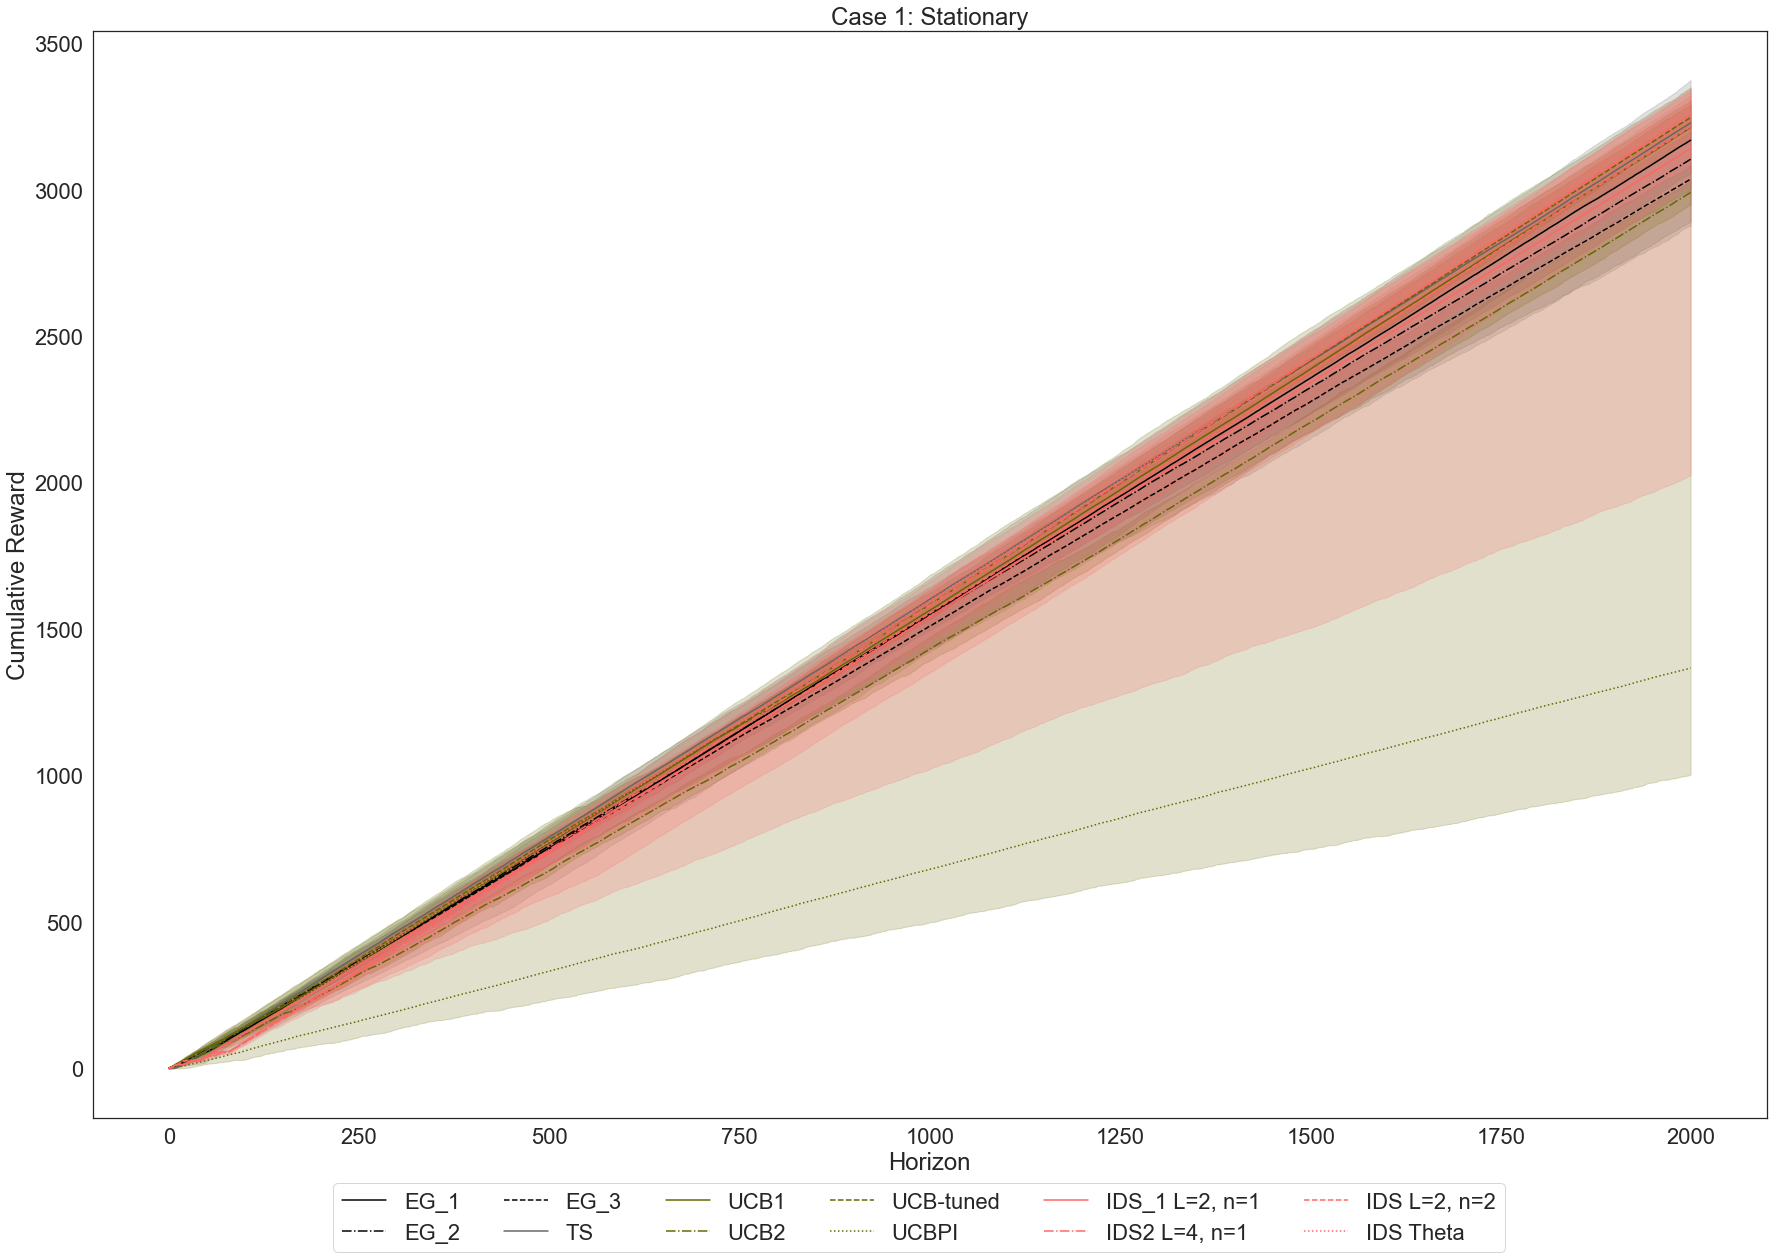

In [68]:
title = 'Case 1: Stationary'
draw_exp_graph(IDS_1_df, IDS_2_df, IDS_3_df, IDST_1_df,UCB_1_df, UCB_2_df, UCBT_df,UCBPI_df,TS_df,EG_1_df, EG_2_df, EG_3_df, title)

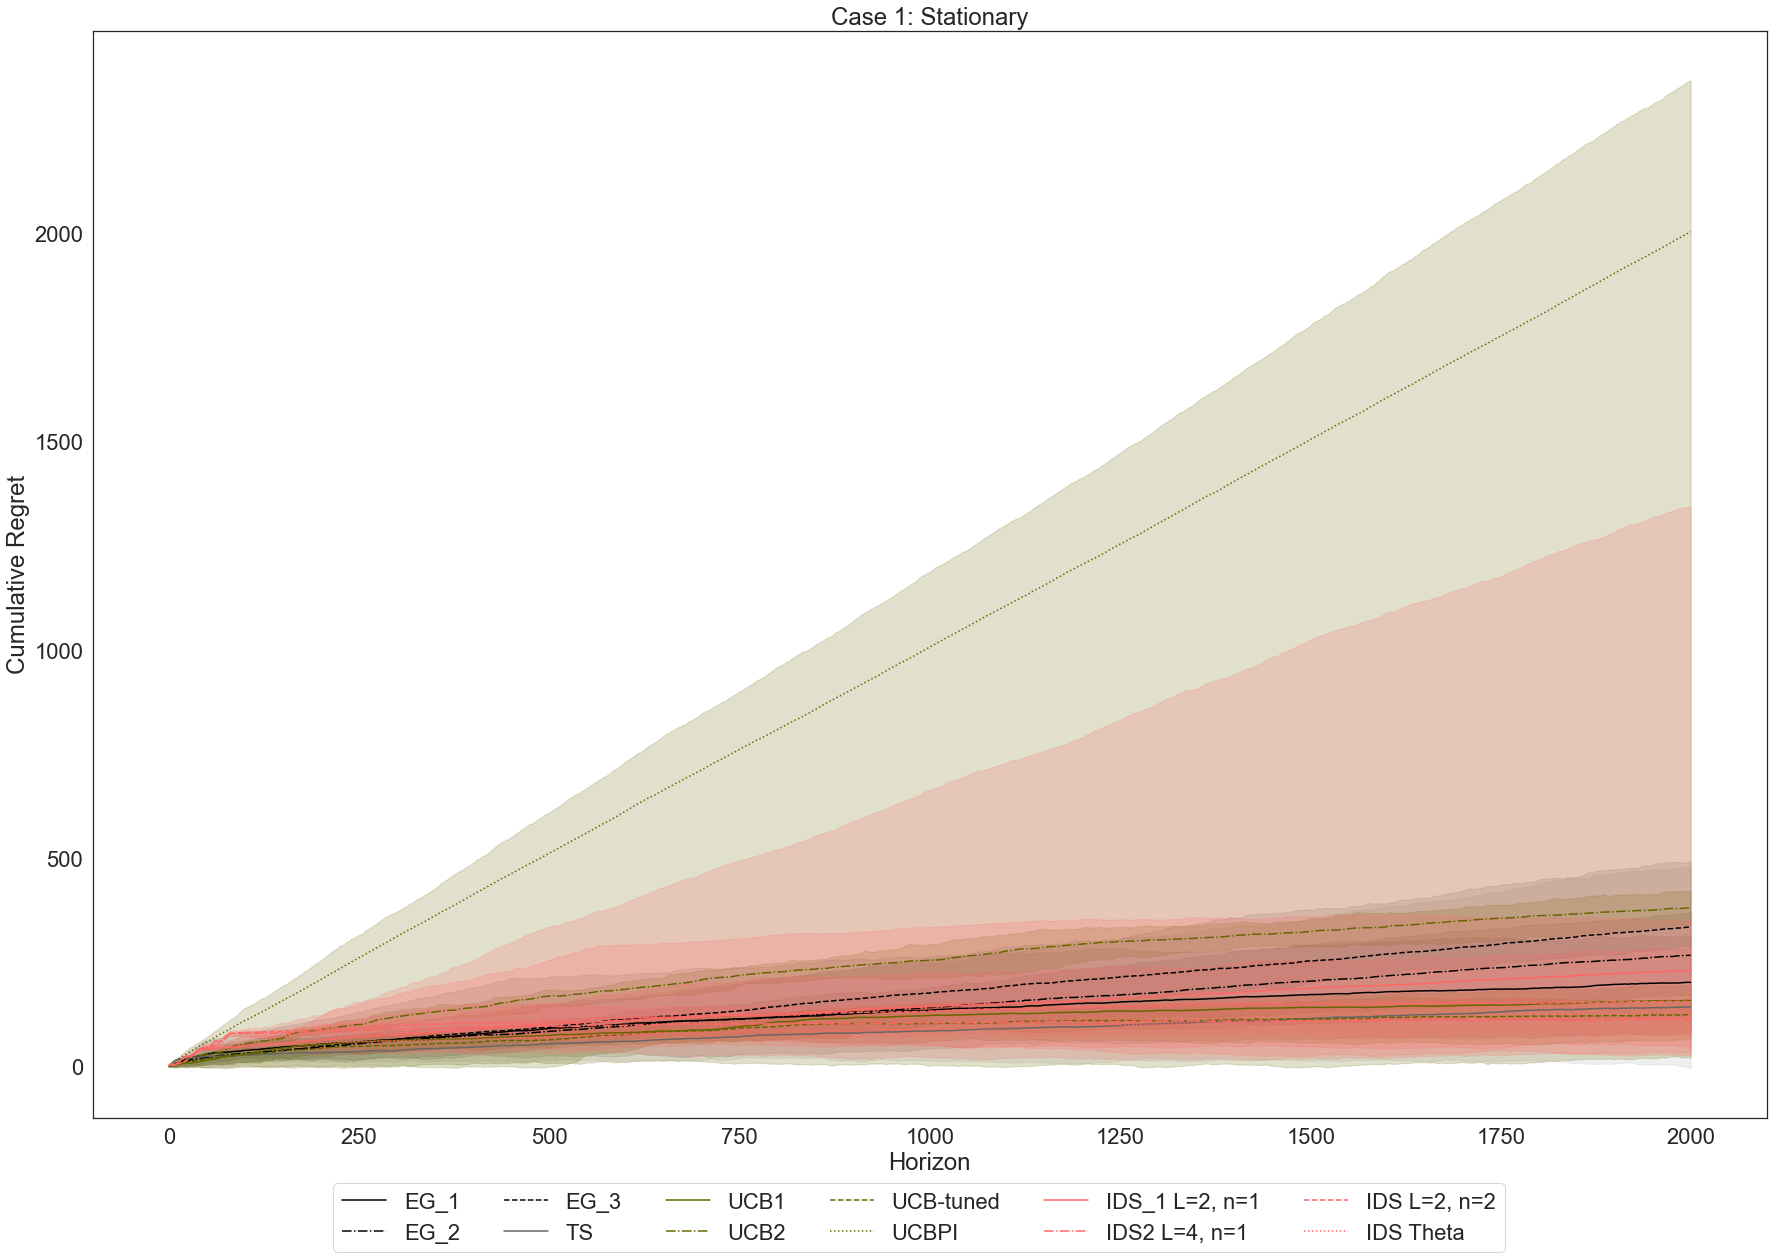

In [73]:
optimal_reward_per = pd.DataFrame(np.repeat(max(df.groupby('arm')['reward'].mean()), T)).T
optimal_reward = optimal_reward_per.cumsum(axis=1)
draw_regret(optimal_reward, IDS_1_df, IDS_2_df, IDS_3_df, IDST_1_df,UCB_1_df, UCB_2_df, UCBT_df,UCBPI_df,TS_df,EG_1_df, EG_2_df, EG_3_df, title, bounds=True)

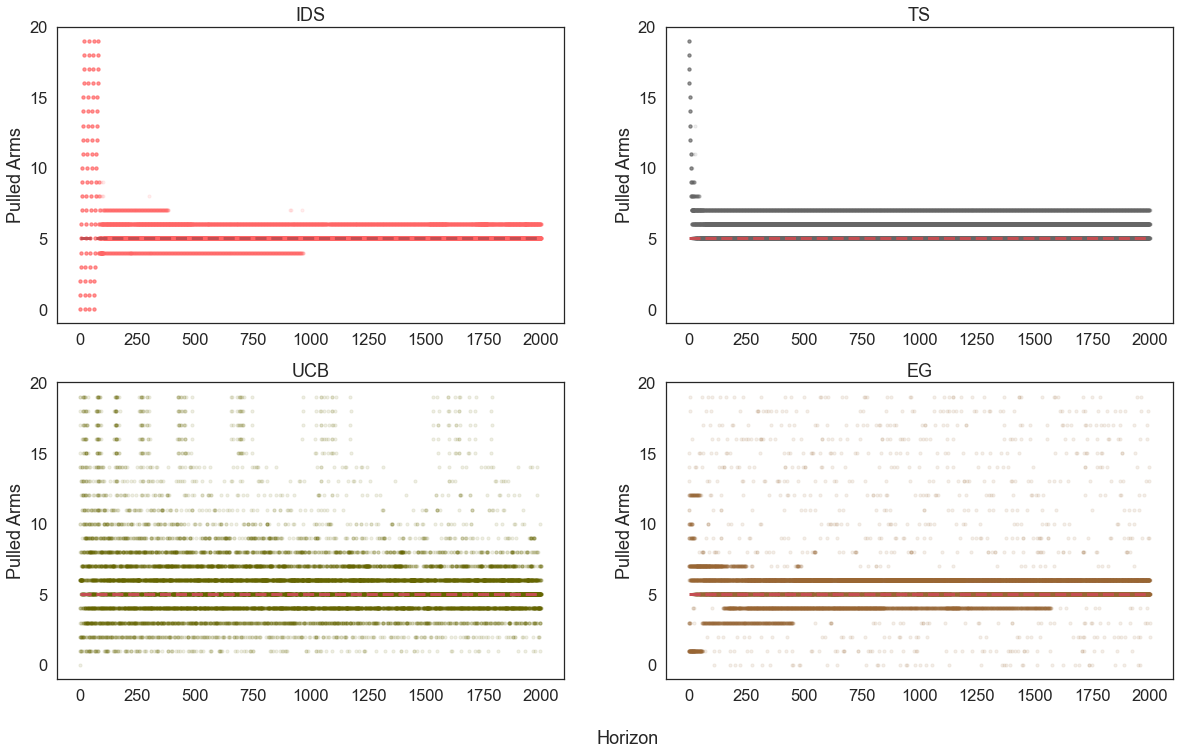

In [55]:
draw_arm(IDS_2_df_arm, TS_df_arm, UCB_2_df_arm, EG_1_df_arm)

IDS_1


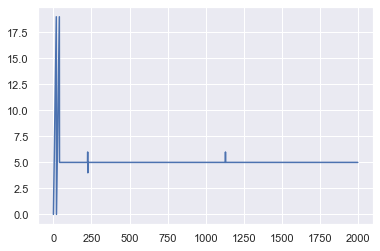

1.6520140350877197
collection rounds: 40
IDS_2


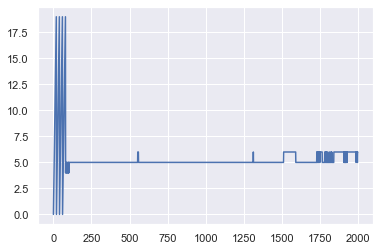

1.643843859649123
collection rounds: 80
IDS_3


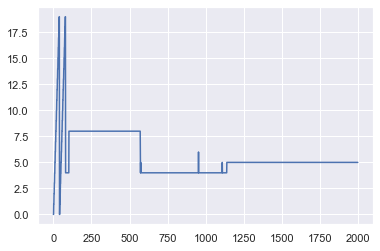

1.7232526315789478
collection rounds: 80
IDST_1


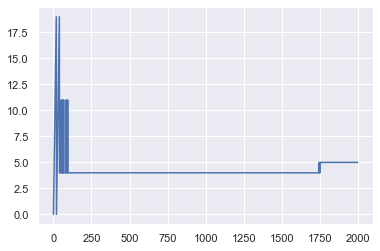

1.6950596491228074
collection rounds: 40
UCB1


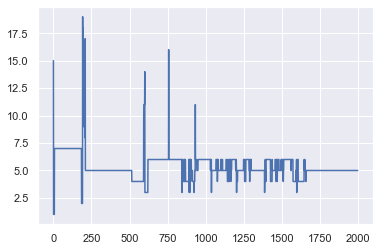

1.6962000000000004
UCBPI


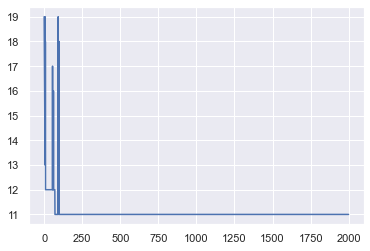

0.5073473684210527
TS


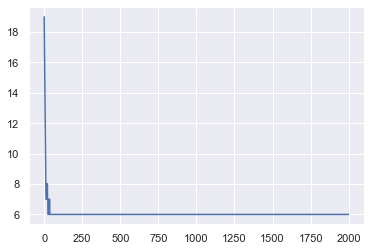

1.659401754385965
EG


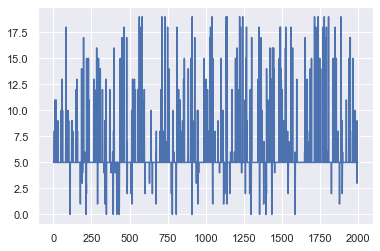

1.529682456140351


In [45]:
sns.set(font_scale=1)
print('IDS_1')
plt.plot(IDS_1_arm)
plt.show()
print(IDS_1_re[-300:].mean())
print('collection rounds:', IDS_1.collection_rounds)

print('IDS_2')
plt.plot(IDS_2_arm)
plt.show()
print(IDS_2_re[-300:].mean())
print('collection rounds:', IDS_2.collection_rounds)

print('IDS_3')
plt.plot(IDS_3_arm)
plt.show()
print(IDS_3_re[-300:].mean())
print('collection rounds:', IDS_3.collection_rounds)

print('IDST_1')
plt.plot(IDST_1_arm)
plt.show()
print(IDST_1_re[-300:].mean())
print('collection rounds:', IDST_1.collection_rounds)

print('UCB1')
plt.plot(UCB1_arm)
plt.show()
print(UCB1_re[-300:].mean())

print('UCBPI')
plt.plot(UCBPI_arm)
plt.show()
print(UCBPI_re[-300:].mean())

print('TS')
plt.plot(TS_arm)
plt.show()
print(TS_re[-300:].mean())

print('EG')
plt.plot(EG_arm)
plt.show()
print(EG_re[-300:].mean())

In [79]:
# IDS_1_df_arm['policy'] = 'IDS_1'
# IDS_2_df_arm['policy'] = 'IDS_2'
# IDS_3_df_arm['policy'] = 'IDS_3'
# IDST_1_df_arm['policy'] = 'IDST_1'
# UCB_1_df_arm['policy'] = 'UCB_1'
# UCB_2_df_arm['policy'] = 'UCB_2'
# UCBT_df_arm['policy'] = 'UCBT'
# UCBPI_df_arm['policy'] = 'UCBPI'
# TS_df_arm['policy'] = 'TS'
# EG_1_df_arm['policy'] = 'EG_1'
# EG_2_df_arm['policy'] = 'EG_2'
# EG_3_df_arm['policy'] = 'EG_3'
# exp_reward = IDS_1_df.append(IDS_2_df).append(IDS_3_df).append(IDS_3_df).append(IDS_3_df).append(IDST_1_df).append(UCB_1_df)\
#     .append(UCB_2_df).append(UCBT_df).append(UCBPI_df).append(TS_df).append(EG_1_df).append(EG_2_df).append(EG_3_df)
# exp_arm = IDS_1_df_arm.append(IDS_2_df_arm).append(IDS_3_df_arm).append(IDS_3_df_arm).append(IDS_3_df_arm).append(IDST_1_df_arm).append(UCB_1_df_arm)\
#     .append(UCB_2_df_arm).append(UCBT_df_arm).append(UCBPI_df_arm).append(TS_df_arm).append(EG_1_df_arm).append(EG_2_df_arm).append(EG_3_df_arm)

In [86]:
# exp_reward.to_csv('exp1_reward.csv')
# exp_arm.to_csv('exp1_arm.csv')